<Axes: xlabel='Datetime'>

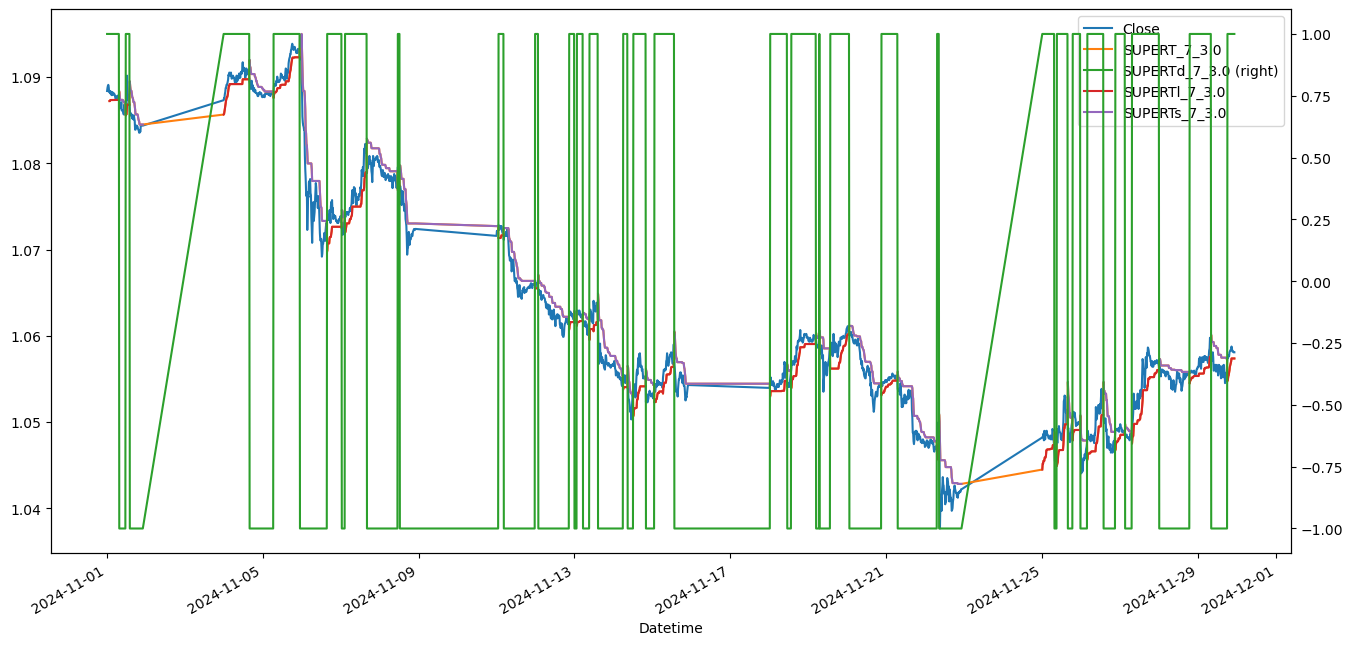

In [294]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf
from backtesting import Backtest, Strategy
import matplotlib as plt


df = pd.read_csv("eurusd15M.csv",parse_dates=[0],index_col=0)
df.index = pd.to_datetime(df.index, utc=True)
df= df.loc["2024-11"]

supertrend = ta.supertrend(df['High'], df['Low'], df['Close'], length=7, multiplier=3)
df = df.Close
df = pd.concat([df, supertrend], axis=1)
df.iloc[1:,:].plot(figsize=(16,8),secondary_y="SUPERTd_7_3.0")
# df.plot(figsize=(16,8),secondary_y="SUPERTd_7_3.0")
# df

In [313]:
df = pd.read_csv("EURUSD.csv",parse_dates=[0],index_col=0)
df.index = pd.to_datetime(df.index, utc=True)
df = df.loc["2014":]
df["ATR"] = ta.atr(df['High'], df['Low'], df['Close'],length=14)
def super_trend(df,len,mul):
    
    supertrend = ta.supertrend(df['High'], df['Low'], df['Close'], length=len, multiplier=mul)
    df = df.Close
    df = pd.concat([df, supertrend], axis=1)
    
    # return df.iloc[:,2].to_frame()
    return df.iloc[:,2].to_frame()
    
super_trend(df,10,3)
# df.dropna(inplace=t)
df

,Open,High,Low,Close,Adj Close,Volume,ATR
Date,,,,,,,
2014-01-01 00:00:00+00:00,1.374495,1.377904,1.374400,1.374495,1.374495,0,NaN
2014-01-02 00:00:00+00:00,1.376595,1.377467,1.363271,1.376671,1.376671,0,NaN
2014-01-03 00:00:00+00:00,1.366624,1.367297,1.360170,1.366662,1.366662,0,NaN
2014-01-06 00:00:00+00:00,1.359582,1.364610,1.357279,1.359601,1.359601,0,NaN
2014-01-07 00:00:00+00:00,1.363066,1.365799,1.359878,1.363196,1.363196,0,NaN
...,...,...,...,...,...,...,...
2024-10-03 00:00:00+00:00,1.104850,1.104850,1.100958,1.104850,1.104850,0,0.007321
2024-10-04 00:00:00+00:00,1.103558,1.103997,1.095614,1.103558,1.103558,0,0.007458
2024-10-07 00:00:00+00:00,1.097454,1.098503,1.095554,1.097454,1.097454,0,0.007497


In [318]:
   
class BackTest(Strategy):
    len = 10
    mul = 3
    mysize=100
    sl_cof = 1
    tp_cof = 3
    
    def init(self):
        position = self.I(super_trend, self.data.df, self.len, self.mul)
        self.position_indicator =  position #self.data.df["position"]
        
    def next(self):
        current_position = self.position_indicator[-1]
        atr = self.data.df['ATR'].iloc[-1]  # Get the latest ATR value
        current_price = self.data.Close[-1]  # Get the current price

        if current_position == 1 and not self.position.is_long:
            self.position.close()
            sl = current_price - self.sl_cof*atr
            tp = current_price + self.tp_cof* atr
            if sl < current_price < tp:  # Validate SL and TP
                self.buy(sl=sl, tp=tp,size=self.mysize)
            else:
                pass

        # Short trade
        elif current_position == -1 and not self.position.is_short:
            self.position.close()
            sl = current_price + self.sl_cof*atr
            tp = current_price - self.tp_cof* atr
            if tp < current_price < sl:  # Validate SL and TP
                self.sell(sl=sl, tp=tp,size=self.mysize)
            else:
                pass
                


bt = Backtest(df.dropna(),BackTest,cash=10_000,commission=0.005)

state = bt.run()


# state = bt.optimize(
#     mul = range(1,6,1),
#     len = range(10,100,1),
#     maximize='Equity Final [$]' #, 'Profit Factor', 'Win Rate [%]'] 
#     # constraint=lambda param : param.len > param.std# Use skopt for optimizatio   
# )


state.to_frame()
# bt.plot()


,0
Start,2014-01-21 00:00:00+00:00
End,2024-10-09 00:00:00+00:00
Duration,3914 days 00:00:00
Exposure Time [%],99.928418
Equity Final [$],9786.317938
Equity Peak [$],10015.341875
Return [%],-2.136821
Buy & Hold Return [%],-18.992424
Return (Ann.) [%],-0.194626
Volatility (Ann.) [%],0.092661


In [319]:

state[1]
bt.plot()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4968\1647396600.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state[1]
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'M

GridPlot(id='p14293', ...)